In [142]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz  # 트리 그리기
import graphviz
# 다른 방식(.dot -> .png 형식, 출력화|면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image

# Over Sampling
from imblearn.over_sampling import SMOTE

# Check the Frequency of Variable
from collections import Counter

# 회귀분석
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from datetime import datetime

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
# XGBOOST 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

#
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

# 스케일러
from sklearn.preprocessing import StandardScaler

#
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# 모델



# Decision Tree 
from sklearn.tree import DecisionTreeRegressor
# Tree - RandomForest
from sklearn.ensemble import RandomForestRegressor
# Tree - GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
# Decision Tree - 분류 
from sklearn.tree import DecisionTreeClassifier
# Random Forest - 분류 
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting - 분류
from sklearn.ensemble import GradientBoostingClassifier
# XGBOOST - 분류
from xgboost import XGBClassifier
# SVM - 분류
from sklearn.svm import SVC
# NN (MLPClassifier) - 분류
from sklearn.neural_network import MLPClassifier
# KNN - 분류
from sklearn.neighbors import KNeighborsClassifier
# KNN 결측처리
from sklearn.impute import KNNImputer

# 선형회귀
from sklearn.linear_model import LinearRegression
# 로지스틱 선형회귀(2진분류)
from statsmodels.api import Logit

#시계열 - arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# 시계열 - auto arima
from pmdarima import auto_arima




import warnings
warnings.filterwarnings('ignore')

import os
os.environ["PATH"] += os.pathsep + '/usr/bin'

%matplotlib inline

plt.rc('font', family = 'NanumGothic')
plt.rc('axes', unicode_minus=False)

In [143]:
df = pd.read_csv('/home/piai/실습파일/2. Big Data 분석/SCALE불량.csv', encoding = 'euc-kr')
df

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  fur_ex_temp      1000 non-null   i

In [145]:
df.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

In [146]:
df.drop("plate_no", axis = 1, inplace = True)
df['scale'] = df['scale'].map({'양품': 0, '불량':1})
df = df.dropna(subset=['scale'])
df['scale'] = df['scale'].astype(int)
df

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,03JAN2023:07:07:53,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,03JAN2023:07:21:22,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,03JAN2023:07:31:15,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,03JAN2023:07:41:01,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,03JAN2023:07:52:40,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10JAN2023:05:32:25,0,BV-A,프랑스,C,19,3400,41500,적용,1호기,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
996,10JAN2023:05:39:19,0,LR-A,영국,C,19,3400,41500,적용,1호기,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
997,10JAN2023:05:52:41,0,AB/AH32,미국,C,17,3400,43700,적용,2호기,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
998,10JAN2023:06:01:50,0,NV-A32,영국,C,17,3400,43700,적용,2호기,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


In [147]:
df_numeric = df.select_dtypes(exclude = 'object')
df_numeric

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
0,0,32,3700,15100,1144,116,1133,59,259,1133,934,8
1,0,32,3700,15100,1144,122,1135,53,238,1135,937,8
2,0,33,3600,19200,1129,116,1121,55,258,1121,889,8
3,0,33,3600,19200,1152,125,1127,68,266,1127,885,8
4,0,38,3100,13300,1140,134,1128,48,246,1128,873,8
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,19,3400,41500,1142,55,1151,86,203,1151,948,10
996,0,19,3400,41500,1142,55,1151,86,209,1151,948,10
997,0,17,3400,43700,1169,65,1163,77,227,1163,948,10
998,0,17,3400,43700,1169,65,1163,77,204,1163,948,10


In [148]:
df.corr().round(3)

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
scale,1.000,-0.098,-0.190,0.052,0.222,-0.036,0.328,-0.220,-0.128,0.328,0.376,-0.040
pt_thick,-0.098,1.000,-0.320,-0.867,-0.525,0.207,-0.666,0.357,0.338,-0.666,-0.363,-0.845
pt_width,-0.190,-0.320,1.000,0.148,0.201,-0.101,0.217,-0.097,-0.133,0.217,-0.060,0.350
pt_length,0.052,-0.867,0.148,1.000,0.471,-0.138,0.603,-0.334,-0.276,0.603,0.291,0.818
fur_heat_temp,0.222,-0.525,0.201,0.471,1.000,-0.164,0.787,-0.373,-0.314,0.787,0.269,0.488
fur_heat_time,-0.036,0.207,-0.101,-0.138,-0.164,1.000,-0.349,0.115,0.736,-0.349,-0.083,-0.167
fur_soak_temp,0.328,-0.666,0.217,0.603,0.787,-0.349,1.000,-0.597,-0.561,1.000,0.459,0.628
fur_soak_time,-0.220,0.357,-0.097,-0.334,-0.373,0.115,-0.597,1.000,0.633,-0.597,-0.308,-0.399
fur_total_time,-0.128,0.338,-0.133,-0.276,-0.314,0.736,-0.561,0.633,1.000,-0.561,-0.209,-0.339
fur_ex_temp,0.328,-0.666,0.217,0.603,0.787,-0.349,1.000,-0.597,-0.561,1.000,0.459,0.628


가열로 균열대 온도(fur_soak_temp)와 가열로 추출온도(fur_ex_temp)의 상관계수가 1이기때문에 가열로 추출온도(fur_ex_temp)를 지워도 될 것 같다.



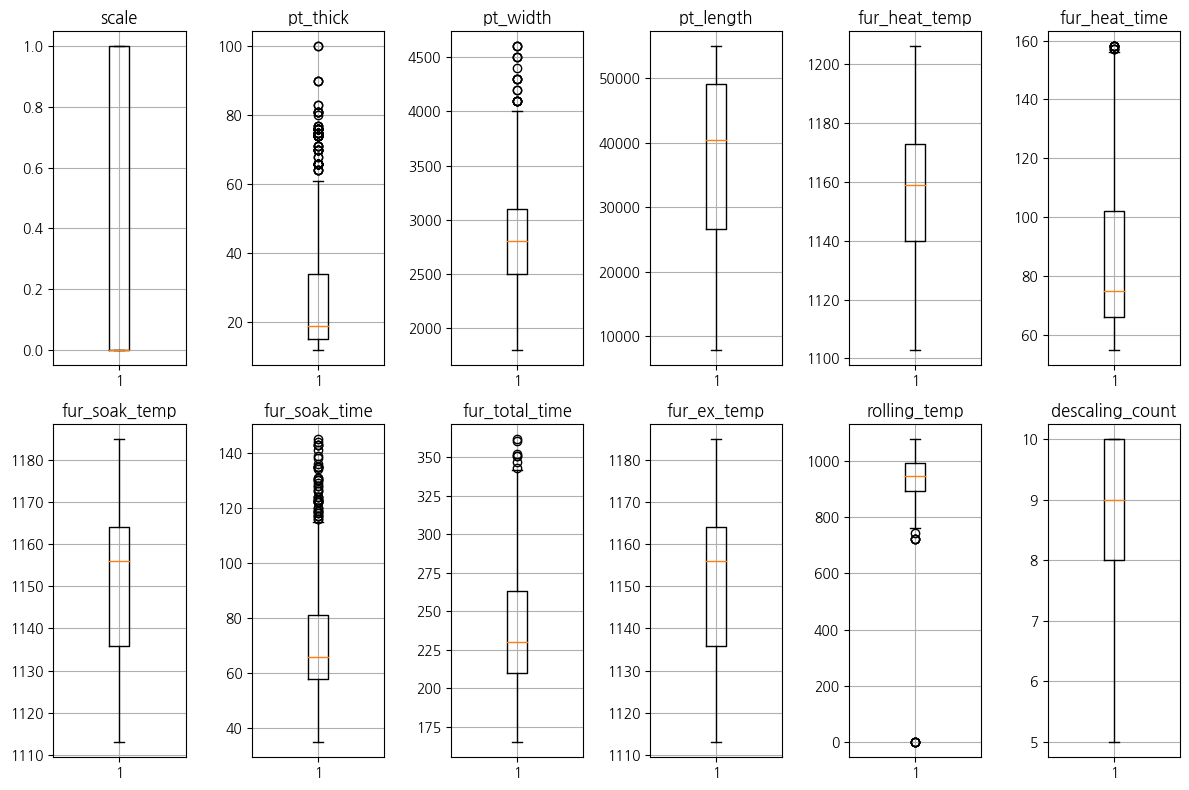

In [149]:
# 박스플롯 그리기
plt.figure(figsize=(12, 8))  # 그래프의 크기 설정

# 숫자형 열 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 박스플롯 그리기
num_plots = len(numeric_cols)
n_rows = 2
n_cols = (num_plots + 1) // 2  # 열의 수를 설정

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # 그래프 레이아웃 설정
    plt.boxplot(df[col], whis=1.5)
    plt.title(col)
    plt.grid(True)

plt.tight_layout()  # 그래프 간의 간격 조절
plt.show()  # 그래프 표시

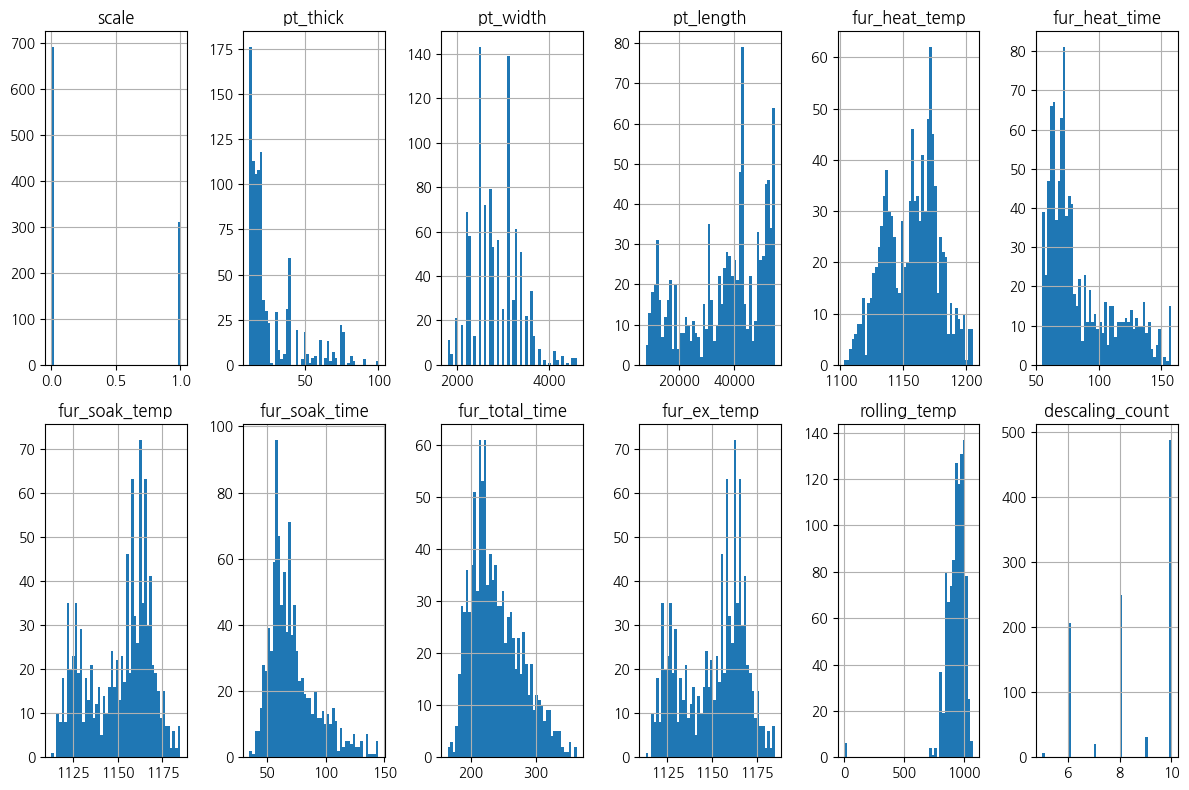

In [150]:
# 히스토그램 그리기
plt.figure(figsize=(12, 8))  # 그래프의 크기 설정

# 숫자형 열 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 히스토그램 그리기
num_plots = len(numeric_cols)
n_rows = 2
n_cols = (num_plots + 1) // 2  # 열의 수를 설정

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # 그래프 레이아웃 설정
    plt.hist(df[col], bins=50)
    plt.title(col)
    plt.grid(True)

plt.tight_layout()  # 그래프 간의 간격 조절
plt.show()  # 그래프 표시

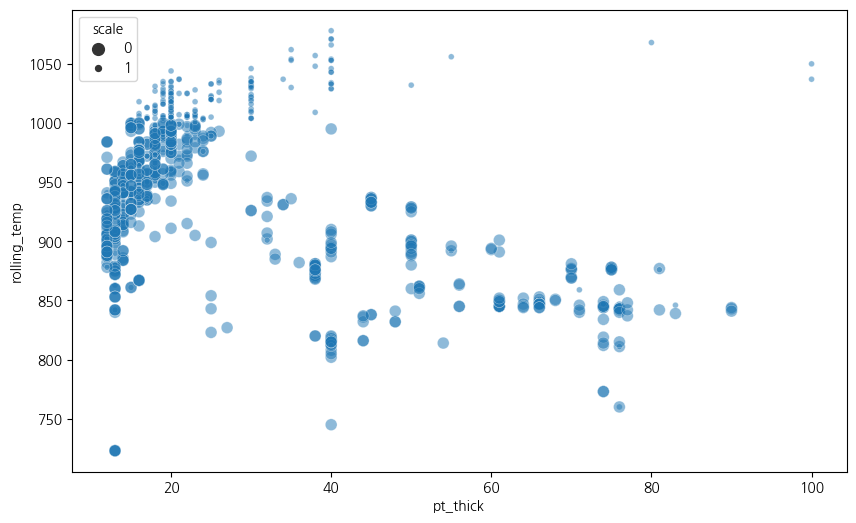

In [163]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pt_thick', y='rolling_temp', size='scale', alpha=0.5)
plt.show()

In [151]:
df[df['rolling_temp']<100]

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
53,03JAN2023:16:22:29,0,GL-E36-TM,독일,T,56,3800,11400,적용,3호기,...,1132,95,1128,80,244,1128,TMCP(온도제어),0,6,1조
221,04JAN2023:19:44:09,0,JS-SM490YB,일본,C,16,2200,43600,적용,3호기,...,1163,57,1166,67,228,1166,CR(제어압연),0,10,2조
222,04JAN2023:19:56:39,0,JS-SM490YB,일본,C,16,2200,43600,적용,3호기,...,1169,64,1164,61,188,1164,CR(제어압연),0,10,2조
598,07JAN2023:11:40:51,0,PILAC-BT33,한국,T,81,2100,12900,적용,2호기,...,1133,89,1122,59,229,1122,CR(제어압연),0,6,3조
599,07JAN2023:11:52:00,0,PILAC-BT33,한국,T,81,2100,13200,적용,1호기,...,1130,92,1124,61,210,1124,CR(제어압연),0,6,3조
600,07JAN2023:11:59:10,0,NV-D32-TM,영국,T,40,2500,23600,적용,3호기,...,1119,109,1117,76,260,1117,TMCP(온도제어),0,6,3조


압연온도 0도 -> 이상치라고 판단함

In [152]:
df[df['fur_total_time']>350]

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
559,07JAN2023:04:43:54,0,PILAC-BT33,한국,T,50,2500,10900,적용,2호기,...,1164,149,1123,98,351,1123,CR(제어압연),888,6,2조
565,07JAN2023:05:51:14,0,PILAC-BT33,한국,T,50,1800,22200,적용,2호기,...,1158,156,1122,96,351,1122,CR(제어압연),901,6,2조
662,07JAN2023:21:59:05,0,NV-A,영국,C,12,3400,52100,적용,2호기,...,1167,147,1137,105,352,1137,CR(제어압연),887,10,4조
699,08JAN2023:04:00:06,0,GL-A,독일,C,15,3100,51800,적용,1호기,...,1156,157,1148,107,361,1148,CR(제어압연),942,10,4조
701,08JAN2023:04:22:24,0,LR-A,영국,C,15,3100,51800,적용,1호기,...,1156,157,1148,99,362,1148,CR(제어압연),942,10,4조


fur_total_time(가열로 총 재로시간) 350분 이상이 이상치라고 나왔지만, 실제 공정에서 350분 이상이 잘못된 재로시간인지는 알아봐야함

In [153]:
df = df.drop(df[df['rolling_temp']<100].index, axis=0).reset_index()

압연온도 0도 -> 이상치 제거함

pt_thick(후판 지시두께 = 목표두께), pt_width(후판 지시폭)은 고객사에서 원하는 지시두께와 지시폭이 어떠한지 모르므로 이상치라고 판단하기 어려울 것 같음

In [154]:
df.groupby("fur_no").count()

,index,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
fur_no,,,,,,,,,,,,,,,,,,,,,
1호기,332,332,332,332,332,332,332,332,332,332,...,332,332,332,332,332,332,332,332,332,332
2호기,324,324,324,324,324,324,324,324,324,324,...,324,324,324,324,324,324,324,324,324,324
3호기,338,338,338,338,338,338,338,338,338,338,...,338,338,338,338,338,338,338,338,338,338


<Axes: >

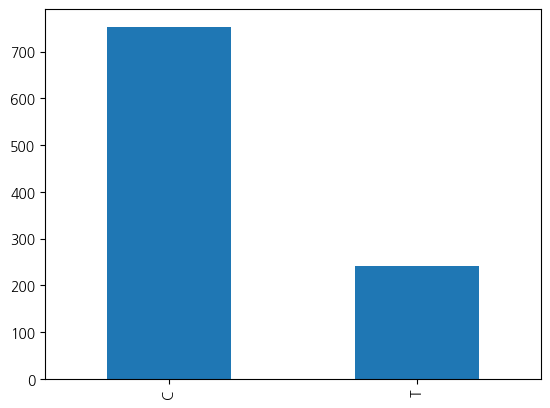

In [155]:
df_agg = df["steel_kind"].value_counts()
df_agg.sort_index(inplace = True)
df_agg.plot.bar()

In [156]:
df[df["steel_kind"]=="C"]

,index,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
116,117,04JAN2023:03:00:41,0,BV-B,프랑스,C,20,3600,39300,적용,...,1129,76,1126,118,297,1126,CR(제어압연),934,8,2조
117,118,04JAN2023:03:14:24,0,BV-B,프랑스,C,20,3600,39500,적용,...,1140,68,1132,104,235,1132,CR(제어압연),911,8,2조
118,119,04JAN2023:03:19:27,0,AB/B,미국,C,17,3400,39600,적용,...,1130,71,1130,112,240,1130,CR(제어압연),935,10,2조
119,120,04JAN2023:03:28:12,0,LR-B,영국,C,17,3400,39600,적용,...,1130,71,1130,112,287,1130,CR(제어압연),935,10,2조
120,121,04JAN2023:03:42:56,0,JS-SM490YB,일본,C,14,3300,51200,적용,...,1140,80,1131,117,286,1131,CR(제어압연),915,10,2조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,995,10JAN2023:05:32:25,0,BV-A,프랑스,C,19,3400,41500,적용,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
990,996,10JAN2023:05:39:19,0,LR-A,영국,C,19,3400,41500,적용,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
991,997,10JAN2023:05:52:41,0,AB/AH32,미국,C,17,3400,43700,적용,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
992,998,10JAN2023:06:01:50,0,NV-A32,영국,C,17,3400,43700,적용,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


<Axes: ylabel='scale'>

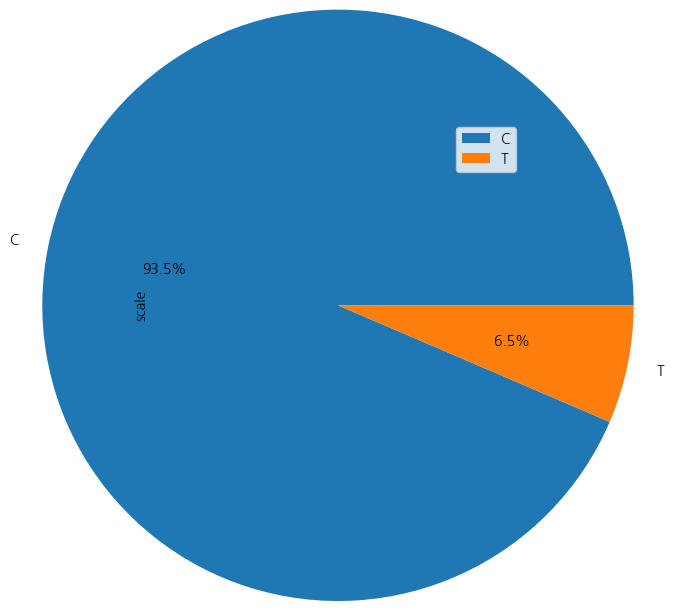

In [157]:
df_sub = df[df["scale"] == 1]
df_count = df_sub.groupby("steel_kind", as_index = False).agg("count")
df_count.plot.pie(y = "scale", labels = df_count["steel_kind"], autopct= "%.1f%%", radius = 2)

불량의 93.5%는 탄소강일 때 발생한다. 티타늄강보다 탄소강의 갯수가 많아서 불량률이 더 높은 것 같다

In [159]:
df[df["rolling_method"]=="CR(제어압연)"]

,index,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
10,10,03JAN2023:08:54:07,0,COMMON,공통,T,38,3100,16200,적용,...,1135,119,1124,73,261,1124,CR(제어압연),881,8,1조
12,12,03JAN2023:09:17:03,0,COMMON,공통,T,38,3100,16200,적용,...,1127,134,1123,58,259,1123,CR(제어압연),869,8,1조
14,14,03JAN2023:09:33:17,0,COMMON,공통,T,38,3100,16200,적용,...,1132,125,1127,62,286,1127,CR(제어압연),820,8,1조
15,15,03JAN2023:09:42:31,1,COMMON,공통,T,38,3100,16200,적용,...,1131,120,1125,68,259,1125,CR(제어압연),1057,8,1조
17,17,03JAN2023:10:00:51,0,COMMON,공통,T,30,1900,34800,적용,...,1119,130,1120,65,282,1120,CR(제어압연),926,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,995,10JAN2023:05:32:25,0,BV-A,프랑스,C,19,3400,41500,적용,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
990,996,10JAN2023:05:39:19,0,LR-A,영국,C,19,3400,41500,적용,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
991,997,10JAN2023:05:52:41,0,AB/AH32,미국,C,17,3400,43700,적용,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
992,998,10JAN2023:06:01:50,0,NV-A32,영국,C,17,3400,43700,적용,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


<Axes: ylabel='scale'>

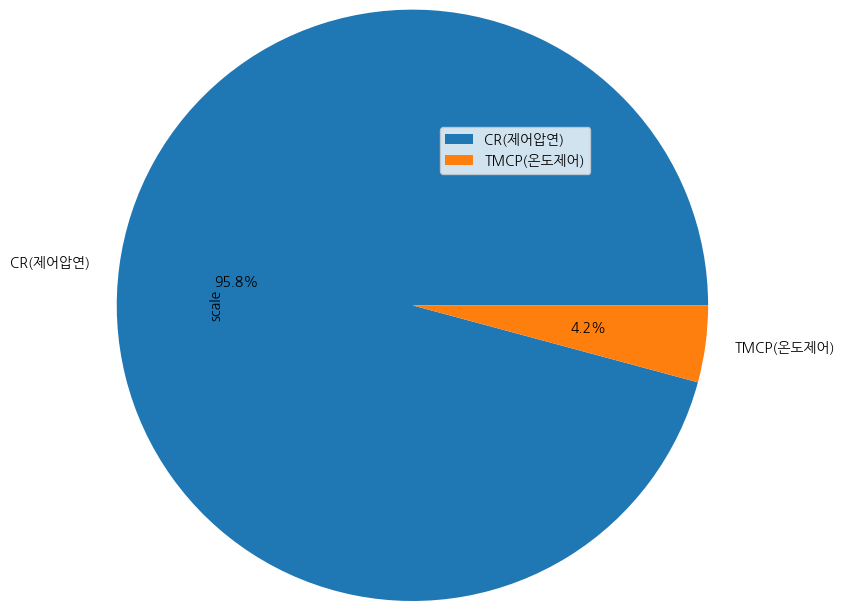

In [139]:
df_sub = df[df["scale"] == 1]
df_count = df_sub.groupby("rolling_method", as_index = False).agg("count")
df_count.plot.pie(y = "scale", labels = df_count["rolling_method"], autopct= "%.1f%%", radius = 2)

In [104]:
df_groups = df.groupby(["hsb"])["scale"]
df_w = pd.DataFrame(columns = ["hsb", "scale_prob"])
c = 0.0
for name, g in df_groups:
    df_w = df_w.append({"hsb" : name , "scale_prob" : (g.tolist().count(1)/(g.shape[0]))}, ignore_index = True )
df_w

,hsb,scale_prob
0,미적용,1.000000
1,적용,0.277719


hsb를 미적용 하면 무조건 scale 발생한다. -> hsb는 무조건 적용해야 한다

In [108]:
len(df.groupby(["spec_long"]))

66

In [119]:
df_groups = df.groupby(["spec_long"])["scale"]
df_w = pd.DataFrame(columns = ["spec_long", "scale_prob"])
c = 0.0
for name, g in df_groups:
    df_w = df_w.append({"spec_long" : name , "scale_prob" : (g.tolist().count(1)/(g.shape[0]))}, ignore_index = True )
df_w

,spec_long,scale_prob
0,A131-DH36TM,1.000000
1,A283-C,0.833333
2,A516-60,0.666667
3,A709-36,0.000000
4,AB/A,0.254902
...,...,...
61,NV-E32-TM,0.000000
62,NV-E36-TM,0.000000
63,PILAC-BT33,0.052632
64,SA283-C,0.476190


In [140]:
df['spec_long'].value_counts()

JS-SM490YB     82
LR-A           81
LR-AH32        52
AB/A           51
NV-A           48
               ..
LR-AH36         1
BV-AH36-TM      1
A131-DH36TM     1
KR-B            1
KS-HSB600       1
Name: spec_long, Length: 66, dtype: int64

spec_long : 군집화해서 양품/불량 비교 해보기

In [ ]:
# 스펙 군집화
df_spec_cluster = df.groupby(["spec_long"]).mean()
df_spec_cluster

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_spec_cluster)
df_scaled[:5]

In [120]:
df_numeric_x = df_numeric.drop("scale", axis = 1)
df_numeric_y = df_numeric["scale"]
df_numeric_x

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
0,32,3700,15100,1144,116,1133,59,259,1133,934,8
1,32,3700,15100,1144,122,1135,53,238,1135,937,8
2,33,3600,19200,1129,116,1121,55,258,1121,889,8
3,33,3600,19200,1152,125,1127,68,266,1127,885,8
4,38,3100,13300,1140,134,1128,48,246,1128,873,8
...,...,...,...,...,...,...,...,...,...,...,...
995,19,3400,41500,1142,55,1151,86,203,1151,948,10
996,19,3400,41500,1142,55,1151,86,209,1151,948,10
997,17,3400,43700,1169,65,1163,77,227,1163,948,10
998,17,3400,43700,1169,65,1163,77,204,1163,948,10


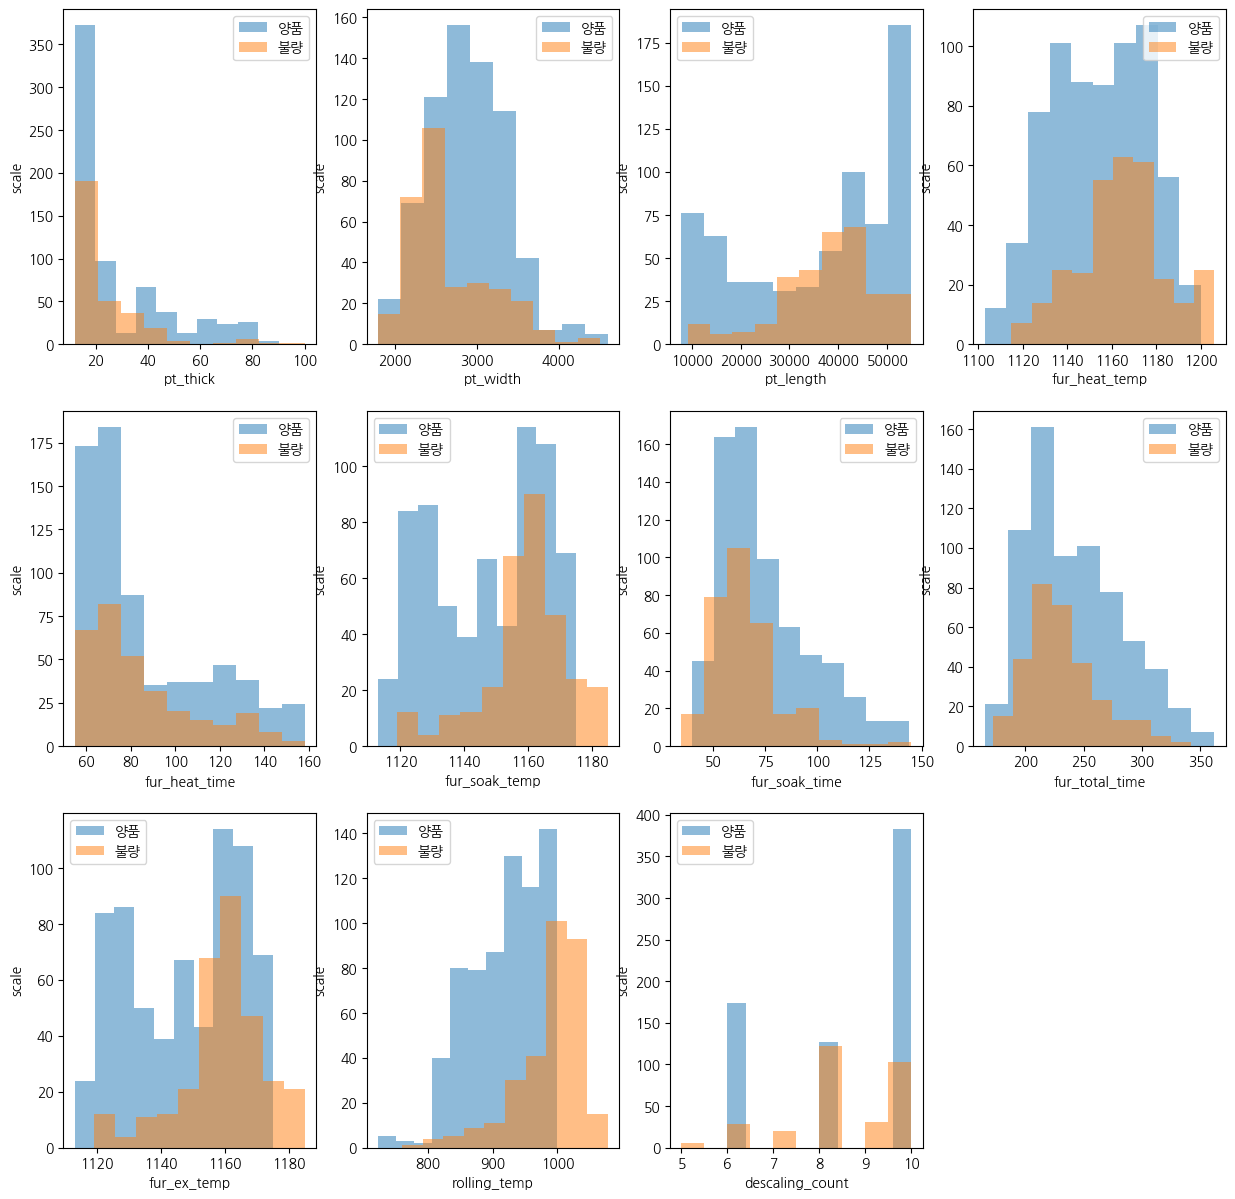

In [137]:
i = 0
n_cols = 4 # 열의 수 설정
fig = plt.figure(figsize = (15, 20))
columns = df_numeric_x.columns
for col in df_numeric_x.columns:
    plt.subplot(n_rows, n_cols, i+1)
    i += 1
    plt.hist(df[df["scale"] == 0][col], label = "양품", alpha = 0.5)
    plt.hist(df[df["scale"] == 1][col], label = "불량", alpha = 0.5)
    plt.xlabel(col)
    plt.ylabel("scale")
    plt.legend()
plt.show()

- 후판 지시두께(pt_thick) 작을 수록, 가열로 가열대/균열대/총 재로시간이 짧을 수록 불량이 높았다.
- (온도 - 압연온도(rolling_temp)는 높을 수록 불량이 높았지만, 가열대 소재온도(fur_heat_temp), 균열대 소재온도(fur_soak_temp), 가열로 추출온도(fur_ex_temp)는 확인필요)

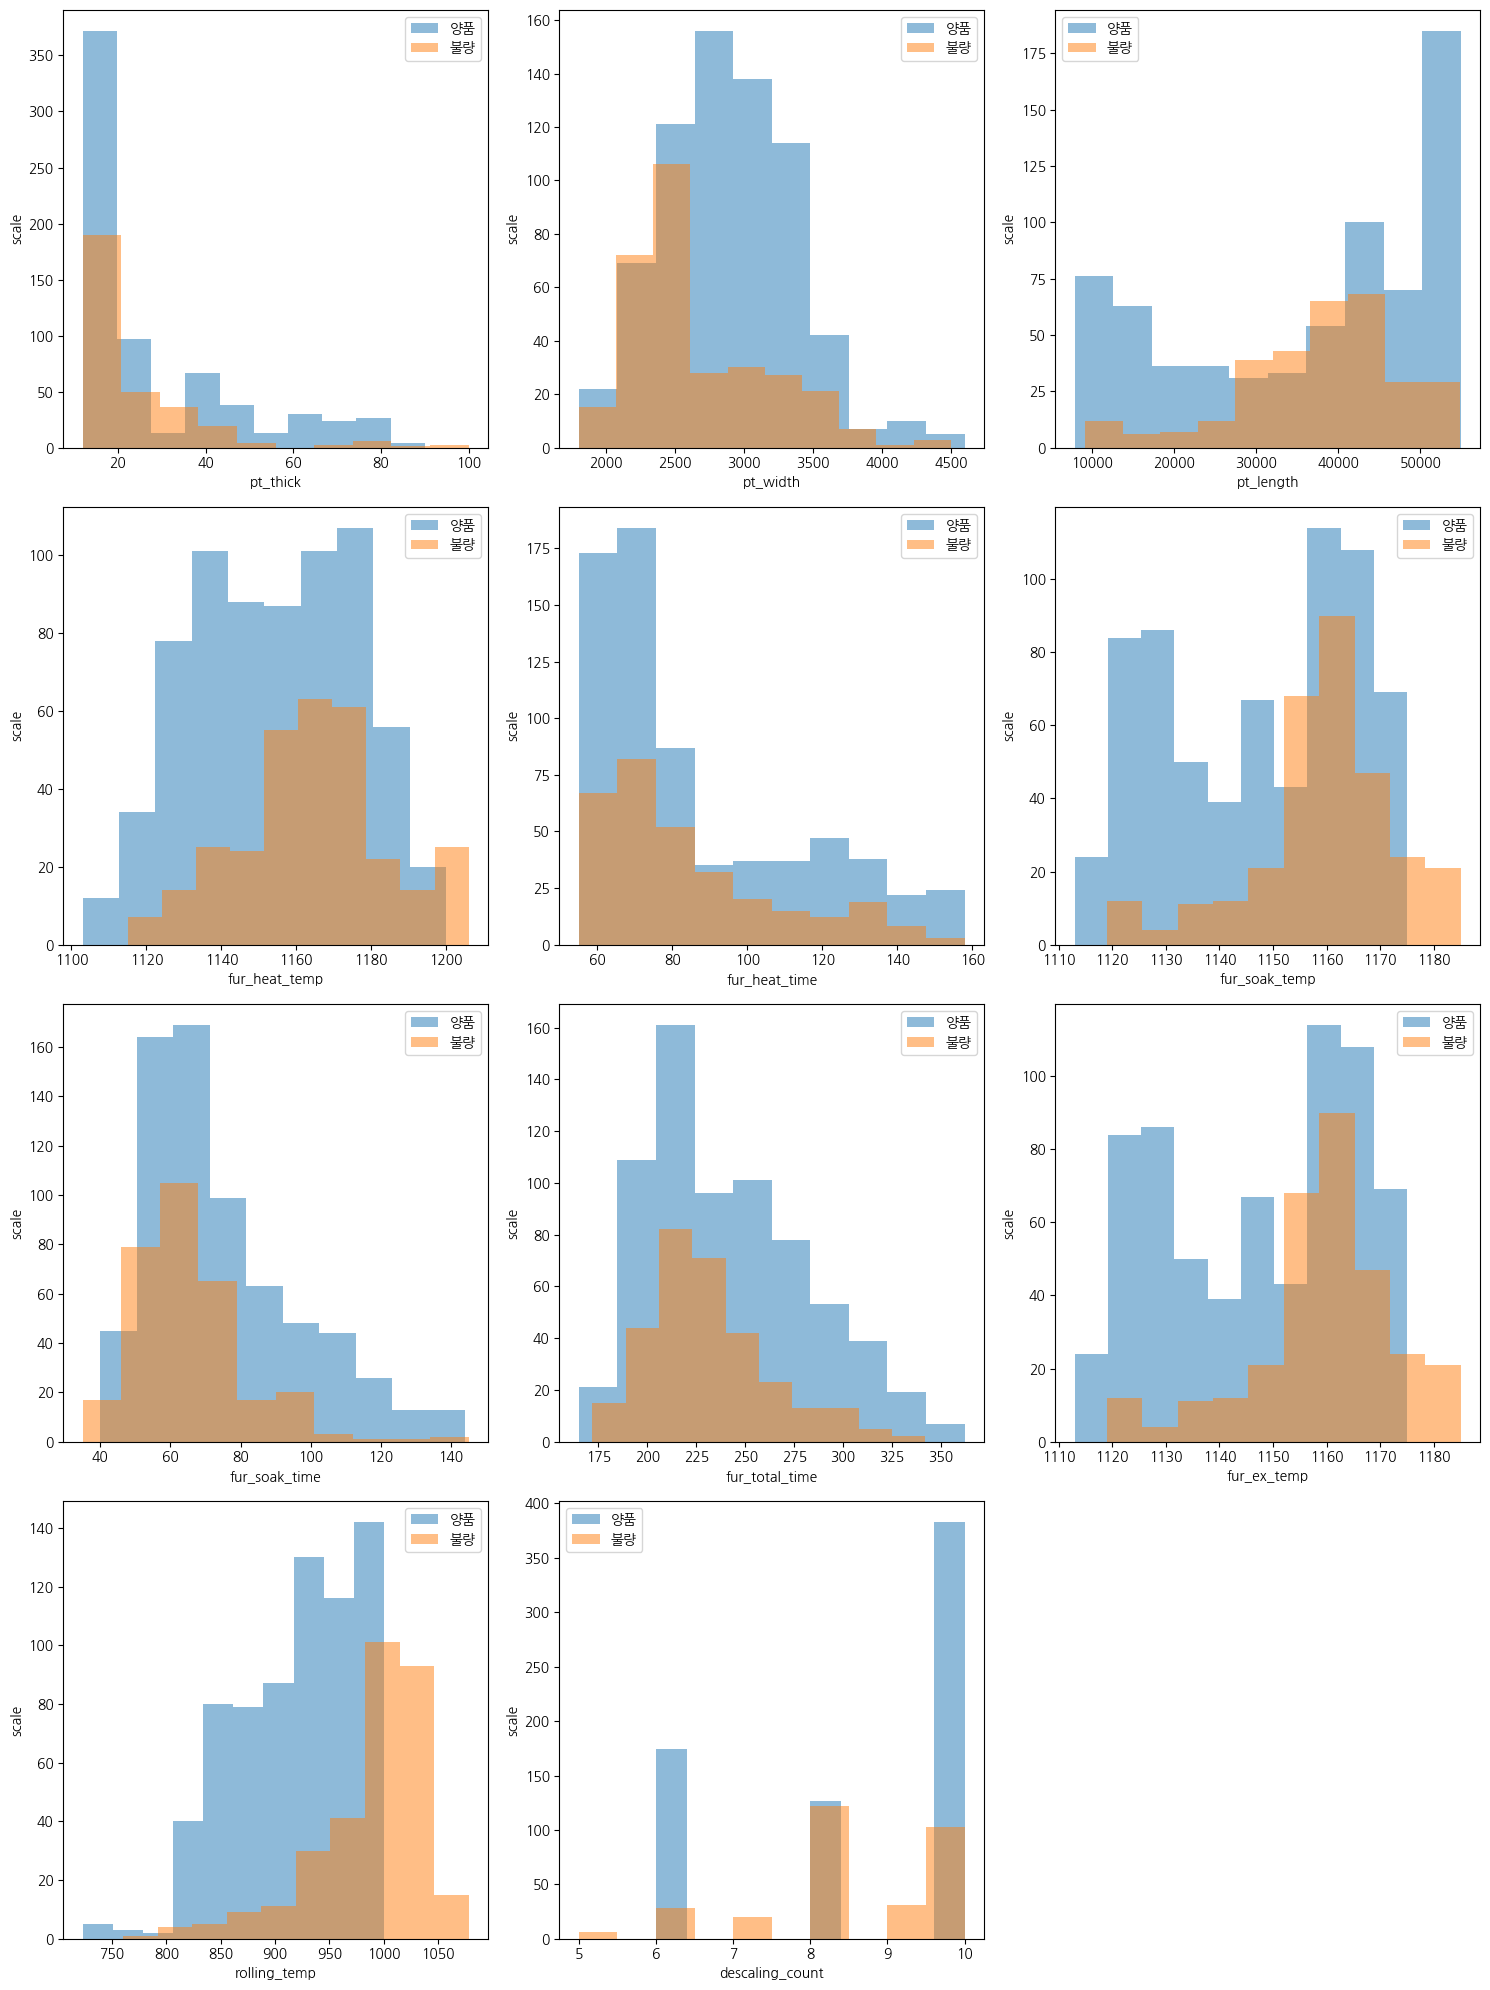

In [133]:

import matplotlib.pyplot as plt
# 글꼴 적용
plt.rc('font', family = 'NanumGothic')
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)

i = 0

fig = plt.figure(figsize = (15, 20))

# 'df_numeric_x'는 숫자형 열만 포함하는 DataFrame이라고 가정합니다.
columns = df_numeric_x.columns

# df_numeric_x.shape[0]은 행의 개수이므로, 여기서는 열의 개수인 df_numeric_x.shape[1]이 맞습니다.
# 그리고 'df'는 'scale' 열을 포함하고 있는 DataFrame이라고 가정합니다.

# subplot의 총 개수를 계산합니다. 만약 열의 개수가 3으로 나누어 떨어지지 않는다면, 한 줄을 추가해야 합니다.
total_plots = df_numeric_x.shape[1]
rows = total_plots // 3 + (total_plots % 3 > 0)

for col in df_numeric_x.columns:
    plt.subplot(rows, 3, i+1)
    i += 1
    plt.hist(df[df["scale"] == 0][col], label = "양품", alpha = 0.5)
    plt.hist(df[df["scale"] == 1][col], label = "불량", alpha = 0.5)
    plt.xlabel(col)
    plt.ylabel("scale")
    plt.legend()

plt.tight_layout()  # 서브플롯들이 겹치지 않도록 조정
plt.show()